In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os


In [2]:
output_path = r"C:\Users\peepl\OneDrive\Desktop\Data sets\FINAL DATASET\Output_folder"


In [3]:
# 6. Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.02,
    height_shift_range=0.02,
    zoom_range=0.02,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
# 7. Create data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(output_path, "train"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(output_path, "valid"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    os.path.join(output_path, "test"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8606 images belonging to 2 classes.
Found 1124 images belonging to 2 classes.
Found 2758 images belonging to 2 classes.


In [5]:
# 8. Build and compile your model (Example structure)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Single neuron for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # Adjust the number of epochs as needed
)


Epoch 1/10
269/269 [==============================] - 228s 843ms/step - loss: 0.4144 - accuracy: 0.8011 - val_loss: 0.3278 - val_accuracy: 0.8443
Epoch 2/10
269/269 [==============================] - 230s 854ms/step - loss: 0.2298 - accuracy: 0.9032 - val_loss: 0.3590 - val_accuracy: 0.8283
Epoch 3/10
269/269 [==============================] - 234s 868ms/step - loss: 0.1883 - accuracy: 0.9219 - val_loss: 0.1697 - val_accuracy: 0.9359
Epoch 4/10
269/269 [==============================] - 223s 829ms/step - loss: 0.1530 - accuracy: 0.9413 - val_loss: 0.1782 - val_accuracy: 0.9359
Epoch 5/10
269/269 [==============================] - 226s 838ms/step - loss: 0.1153 - accuracy: 0.9557 - val_loss: 0.1239 - val_accuracy: 0.9511
Epoch 6/10
269/269 [==============================] - 224s 831ms/step - loss: 0.1030 - accuracy: 0.9622 - val_loss: 0.0764 - val_accuracy: 0.9751
Epoch 7/10
269/269 [==============================] - 221s 820ms/step - loss: 0.0791 - accuracy: 0.9725 - val_loss: 0.1022 -

In [7]:
# 10. Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

87/87 [==============================] - 16s 182ms/step - loss: 0.0454 - accuracy: 0.9848
Test Accuracy: 98.48%


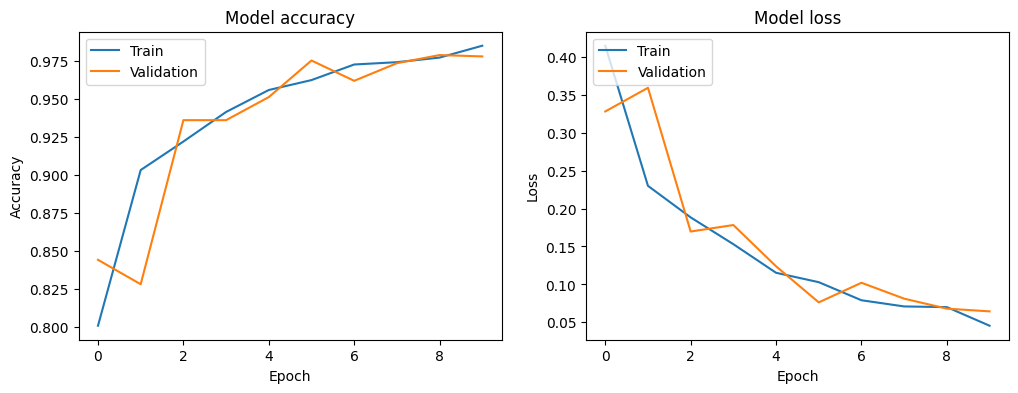

In [8]:
# 11. Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


87/87 [==============================] - 18s 209ms/step


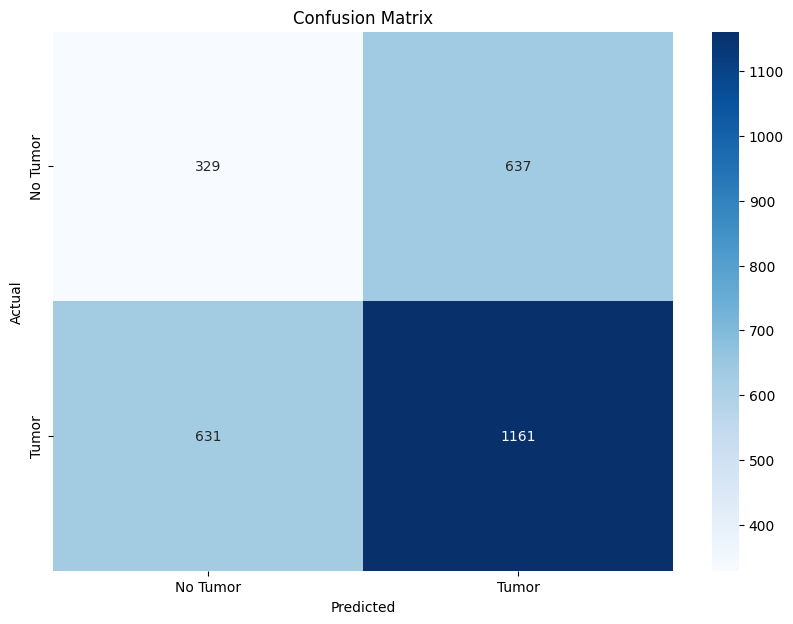

              precision    recall  f1-score   support

    No Tumor       0.34      0.34      0.34       966
       Tumor       0.65      0.65      0.65      1792

    accuracy                           0.54      2758
   macro avg       0.49      0.49      0.49      2758
weighted avg       0.54      0.54      0.54      2758



In [9]:
# 12. Create confusion matrix and classification report
# Get predictions from the model
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).flatten()  # Round and flatten predictions to binary labels

# Get true labels
y_true = test_generator.classes  # True labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['No Tumor', 'Tumor']))
